<a href="https://colab.research.google.com/github/hoangnuthuphuong/Final_HK1/blob/main/Computer_Vision_Colab/CNN_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VGG16 - RESNET


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Check GPU
!nvidia-smi


Thu Jan  2 16:49:29 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import zipfile
import os

# Thư mục giải nén
base_dir = '/content/drive/MyDrive/THỊ GIÁC MÁY TÍNH/'
# giải nén
with zipfile.ZipFile('/content/drive/MyDrive/THỊ GIÁC MÁY TÍNH/dataset_CNN.zip', 'r') as zip_ref:
    zip_ref.extractall(base_dir)

In [ ]:
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Đường dẫn đến thư mục hình ảnh
IMAGE_DIRECTORY = "/content/drive/MyDrive/THỊ GIÁC MÁY TÍNH/dataset_CNN/"
batch_size = 32
img_height = 72
img_width = 128

# Thiết lập biến chuyển đổi hình ảnh
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
])

# Tải dữ liệu
dataset = datasets.ImageFolder(IMAGE_DIRECTORY, transform=transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

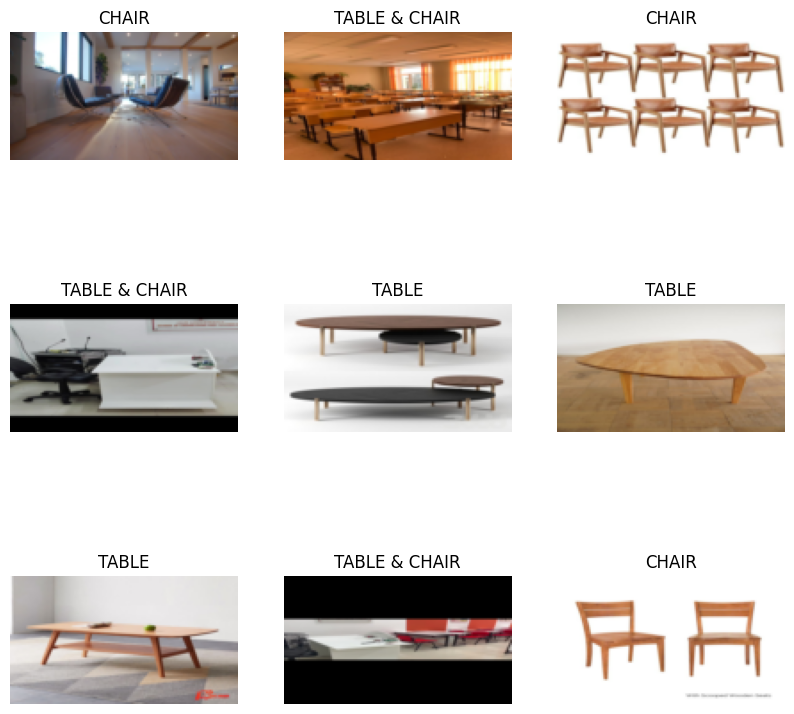

Number of Classes: 3


In [ ]:
# Hiển thị một số hình ảnh
def show_sample_images(loader):
    plt.figure(figsize=(10, 10))
    for images, labels in loader:
        for j in range(9):
            ax = plt.subplot(3, 3, j + 1)
            plt.imshow(images[j].permute(1, 2, 0).numpy())
            plt.title(f"{dataset.classes[labels[j]]}")
            plt.axis("off")
        plt.show()
        break

show_sample_images(train_loader)

num_classes = len(dataset.classes)
print("Number of Classes:", num_classes)

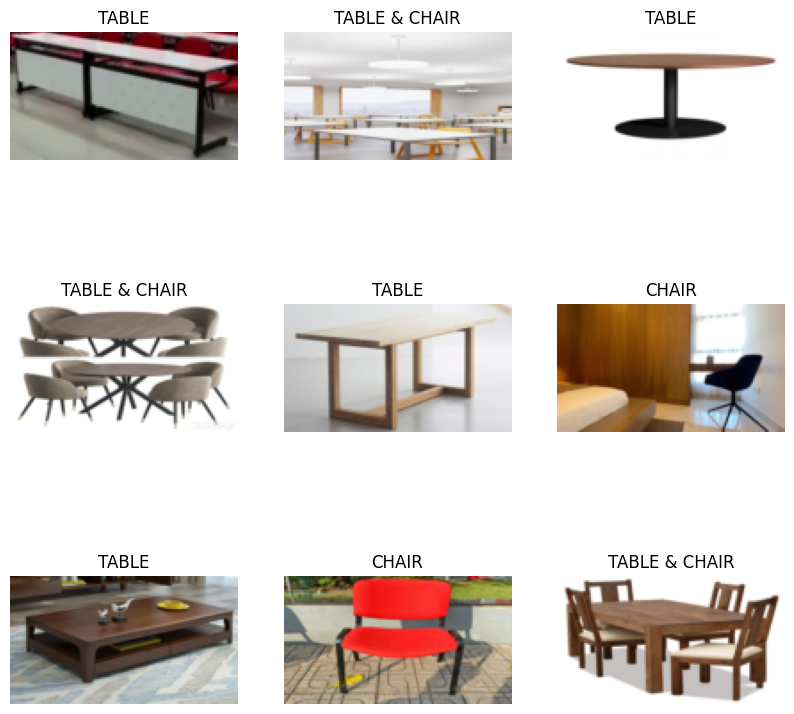

In [ ]:
# Anhr file valid
show_sample_images(val_loader)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.applications import VGG16

# Tải mô hình VGG16 đã được huấn luyện trước với weights từ ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Đặt tất cả các lớp của mô hình VGG16 không huấn luyện
for layer in base_model.layers:
    layer.trainable = False

# Tạo mô hình mới
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # num_classes: số lớp trong tập dữ liệu của bạn

# Xem thông tin mô hình
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,695,427 (105.65 MB)

 Trainable params: 12,979,203 (49.51 MB)

 Non-trainable params: 14,716,224 (56.14 MB)

Training model


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tiền xử lý dữ liệu
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Tỉ lệ dữ liệu kiểm tra
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = data_gen.flow_from_directory(
    '/content/drive/MyDrive/THỊ GIÁC MÁY TÍNH/dataset_CNN',  # Đường dẫn tới thư mục chứa dữ liệu
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # 'categorical' cho nhiều lớp
    subset='training'
)

valid_data = data_gen.flow_from_directory(
    '/content/drive/MyDrive/THỊ GIÁC MÁY TÍNH/dataset_CNN',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # 'categorical' cho nhiều lớp
    subset='validation'
)

# test_data = data_gen.flow_from_directory(
#     '/content/drive/MyDrive/THỊ GIÁC MÁY TÍNH/dataset_CNN',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',  # 'categorical' cho nhiều lớp
#     subset='testing'
# )

test_data = data_gen.flow_from_directory(
    '/content/drive/MyDrive/THỊ GIÁC MÁY TÍNH/dataset_CNN',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # 'categorical' cho nhiều lớp
)

Found 725 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 905 images belonging to 3 classes.


In [ ]:
# compile-Biên dịch mô hình với một hàm mất mát phù hợp và một bộ tối ưu:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=50
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 155s 5s/step - accuracy: 0.6405 - loss: 1.0115 - val_accuracy: 0.5167 - val_loss: 5.9834
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 668ms/step - accuracy: 0.8323 - loss: 0.5092 - val_accuracy: 0.6056 - val_loss: 3.8428
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 661ms/step - accuracy: 0.8812 - loss: 0.3611 - val_accuracy: 0.5722 - val_loss: 2.8080
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 680ms/step - accuracy: 0.8990 - loss: 0.2970 - val_accuracy: 0.6167 - val_loss: 1.9739
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 701ms/step - accuracy: 0.9098 - loss: 0.2577 - val_accuracy: 0.8056 - val_loss: 0.8618
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.9325 - loss: 0.2101 - val_accuracy: 0.7611 - val_loss: 0.9772
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 744ms/step - accuracy: 0.9258 - loss: 0.1995 - val_accuracy: 0.8111 - val_loss: 0.6236
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 687ms/step - accuracy: 0.9187 - loss: 0.2389 - val_accura

In [ ]:
#LƯU MODEL
model.save('vgg16_model.h5')

In [ ]:
# LOAD MODEL SAU KHI ĐÃ LƯU
from tensorflow.keras.models import load_model
model = load_model('vgg16_model.h5')

In [ ]:
# Saving model
import pickle
with open('vgg16_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# LOAD MODLE PICKLE
import pickle
with open('vgg16_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

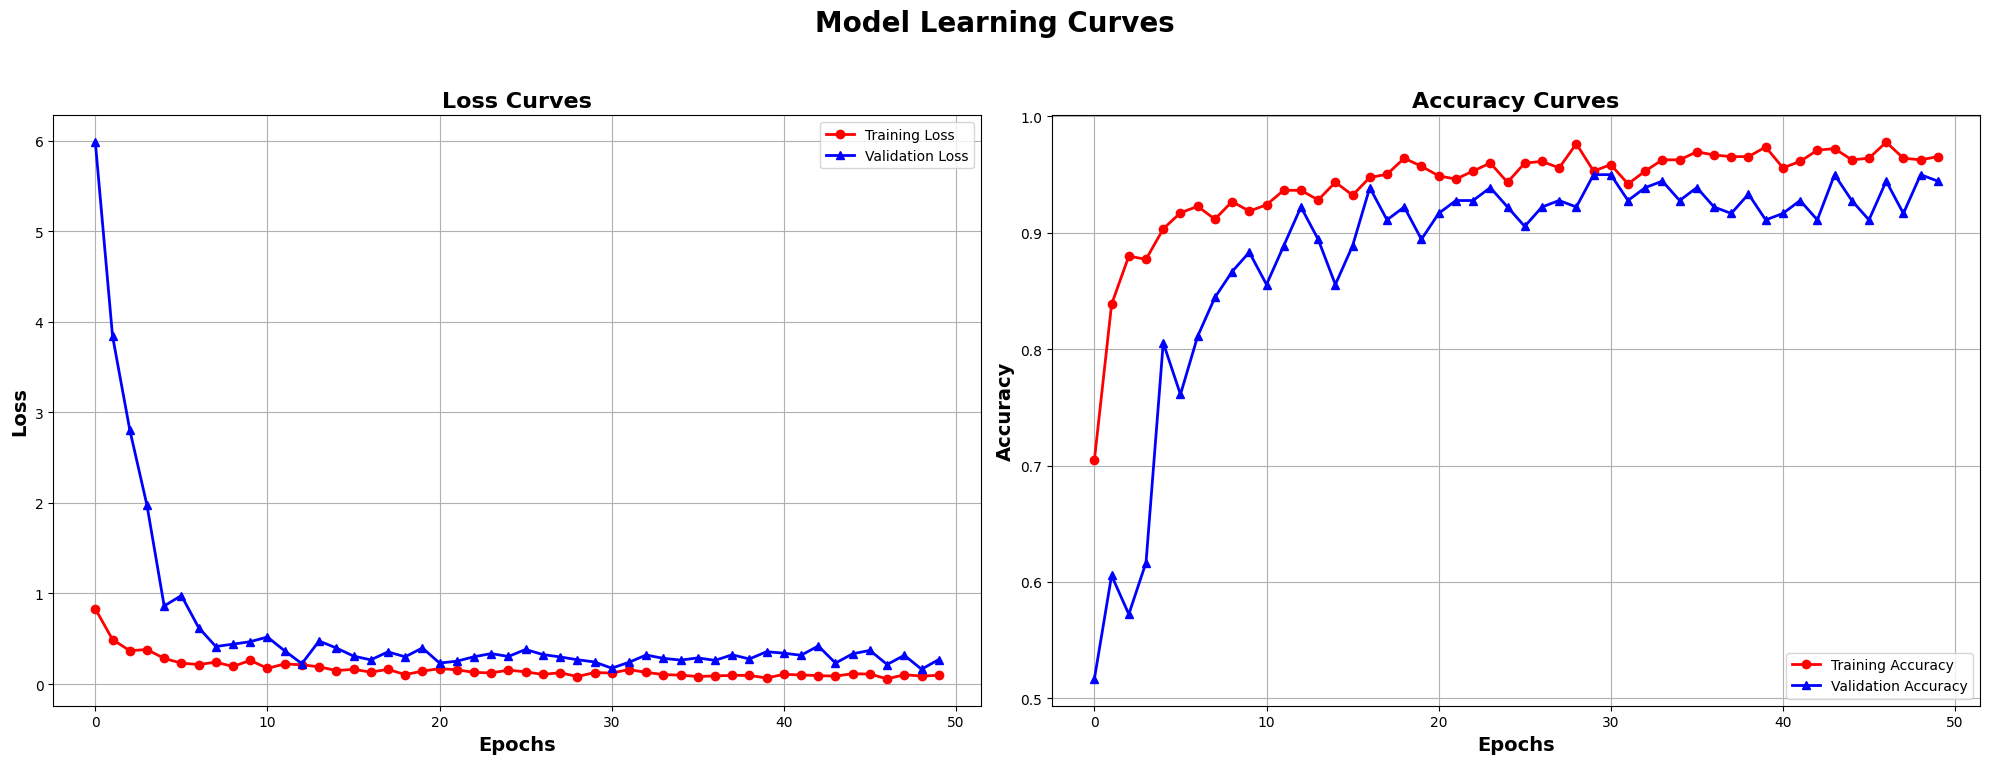

In [ ]:
import matplotlib.pyplot as plt

# Function for plotting training curve
def plot_history(history):
    history_dict = history.history

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))

    # Vẽ độ mất mát
    ax[0].plot(history_dict["loss"], 'ro-', lw=2, markersize=6, label="Training Loss")
    ax[0].plot(history_dict["val_loss"], 'b^-', lw=2, markersize=6, label="Validation Loss")
    ax[0].set_title("Loss Curves", fontsize=16, weight='bold')
    ax[0].legend(loc="upper right")
    ax[0].set_xlabel("Epochs", fontsize=14, weight='bold')
    ax[0].set_ylabel("Loss", fontsize=14, weight='bold')
    ax[0].grid(True)

    # Vẽ độ chính xác
    ax[1].plot(history_dict["accuracy"], 'ro-', lw=2, markersize=6, label="Training Accuracy")
    ax[1].plot(history_dict["val_accuracy"], 'b^-', lw=2, markersize=6, label="Validation Accuracy")
    ax[1].set_title("Accuracy Curves", fontsize=16, weight='bold')
    ax[1].legend(loc="lower right")
    ax[1].set_xlabel("Epochs", fontsize=14, weight='bold')
    ax[1].set_ylabel("Accuracy", fontsize=14, weight='bold')
    ax[1].grid(True)

    fig.suptitle("Model Learning Curves", fontsize=20, weight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Điều chỉnh khoảng cách giữa các biểu đồ
    plt.show()

# Vẽ biểu đồ cho quá trình huấn luyện
plot_history(history)

In [ ]:
# Dự đoán từ tập dữ liệu kiểm tra
test_steps = len(test_data)  # Số bước trong tập kiểm tra
predictions = model.predict(test_data, steps=test_steps)

# Lấy lớp dự đoán
predicted_classes = np.argmax(predictions, axis=1)

# Lấy nhãn thực tế
true_classes = test_data.classes

# In kết quả
for i in range(len(predicted_classes)):
    print(f"Image {i}: True class = {true_classes[i]}, Predicted class = {predicted_classes[i]}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 852ms/step
Image 0: True class = 0, Predicted class = 1
Image 1: True class = 0, Predicted class = 1
Image 2: True class = 0, Predicted class = 2
Image 3: True class = 0, Predicted class = 0
Image 4: True class = 0, Predicted class = 1
Image 5: True class = 0, Predicted class = 2
Image 6: True class = 0, Predicted class = 0
Image 7: True class = 0, Predicted class = 0
Image 8: True class = 0, Predicted class = 1
Image 9: True class = 0, Predicted class = 1
Image 10: True class = 0, Predicted class = 1
Image 11: True class = 0, Predicted class = 1
Image 12: True class = 0, Predicted class = 2
Image 13: True class = 0, Predicted class = 0
Image 14: True class = 0, Predicted class = 0
Image 15: True class = 0, Predicted class = 2
Image 16: True class = 0, Predicted class = 0
Image 17: True class = 0, Predicted class = 0
Image 18: True class = 0, Predicted class = 0
Image 19: True class = 0, Predicted class = 0
Image 20: True class = 0, Predicted class = 1
Im

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


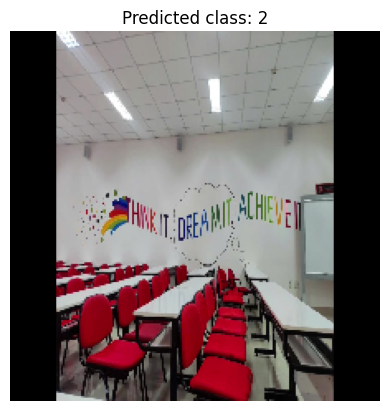

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Đường dẫn đến hình ảnh bạn muốn dự đoán
img_path = '/content/drive/MyDrive/THỊ GIÁC MÁY TÍNH/dataset_CNN/TABLE & CHAIR/0056filename.jpg'

# Tải và tiền xử lý hình ảnh
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch
img_array /= 255.0  # Tiền xử lý giống như trong ImageDataGenerator

# Dự đoán
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Hiển thị hình ảnh và kết quả
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class[0]}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


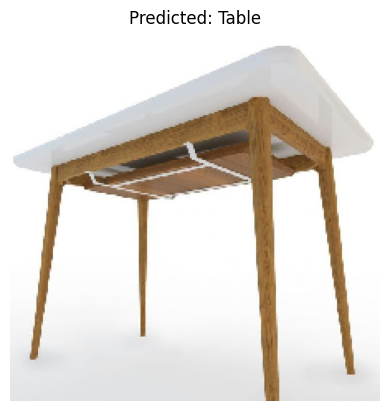

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Đường dẫn đến hình ảnh bạn muốn dự đoán
img_path = '/content/drive/MyDrive/THỊ GIÁC MÁY TÍNH/dataset_CNN/TABLE/0001-table.jpg'

# Tải và tiền xử lý hình ảnh
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch
img_array /= 255.0  # Tiền xử lý giống như trong ImageDataGenerator

# Dự đoán
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Ánh xạ chỉ số lớp thành tên nhãn
class_labels = {0: 'Chair', 1: 'Table', 2: 'Table & Chair'}
predicted_label = class_labels[predicted_class[0]]

# Hiển thị hình ảnh và kết quả
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 717ms/step


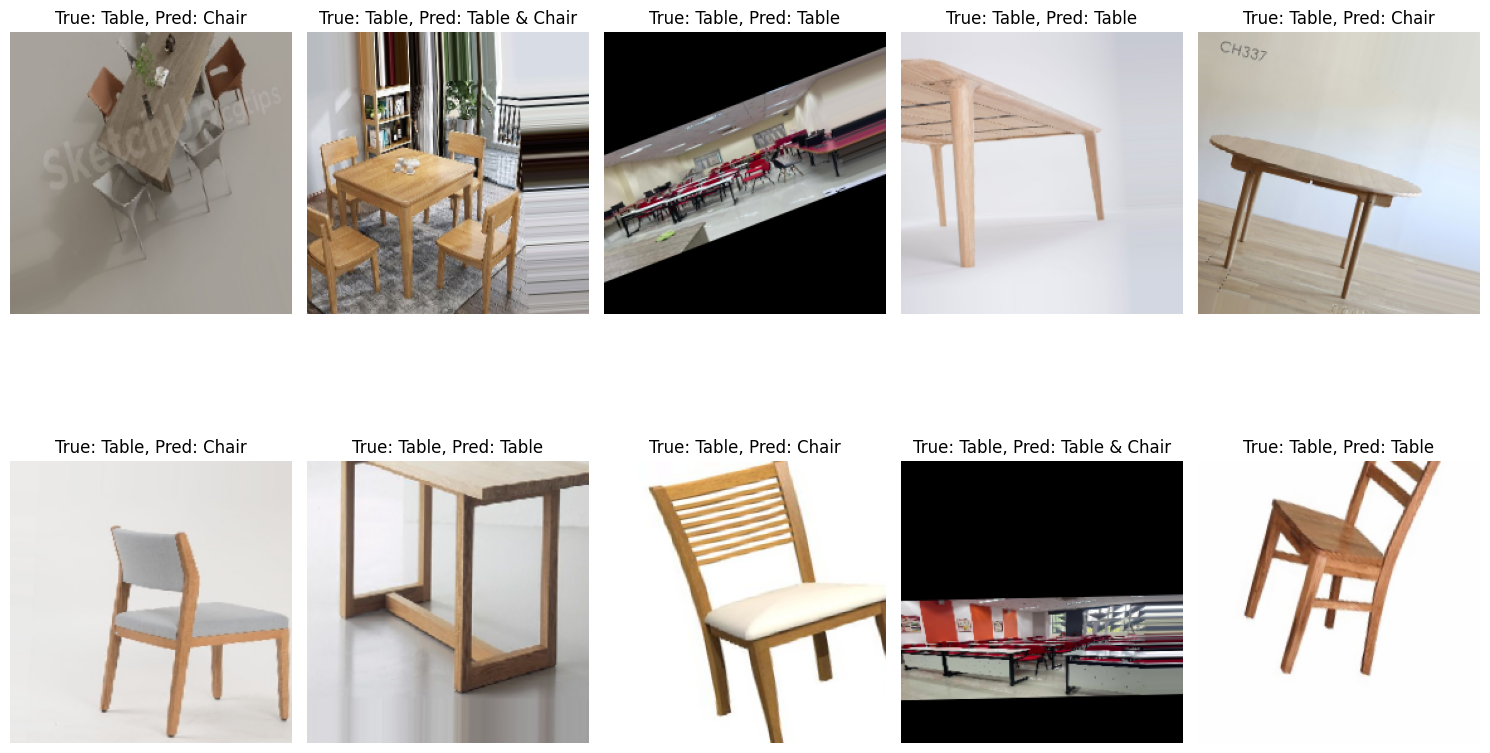

In [ ]:
import matplotlib.pyplot as plt

# Dự đoán từ tập dữ liệu kiểm tra
test_steps = len(test_data)  # Số bước trong tập kiểm tra
predictions = model.predict(test_data, steps=test_steps)

# Lấy lớp dự đoán
predicted_classes = np.argmax(predictions, axis=1)

# Lấy nhãn thực tế
true_classes = test_data.classes

# Ánh xạ chỉ số lớp thành tên nhãn
class_labels = {0: 'Table', 1: 'Chair', 2: 'Table & Chair'}

# Hiển thị kết quả
plt.figure(figsize=(15, 10))

for i in range(min(10, len(predicted_classes))):  # Hiển thị 10 hình đầu tiên
    plt.subplot(2, 5, i + 1)
    img = test_data[i][0][0]  # Lấy hình ảnh
    plt.imshow(img)  # Hiển thị hình ảnh
    true_label = class_labels[true_classes[i]]
    pred_label = class_labels[predicted_classes[i]]
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()